In [1]:
# imports
import numpy as np
import os

import nelpy as nel
import seaborn as sns
import nelpy.plotting as npl
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdm

/home/shayok/Documents/Code/nelpy/nelpy/plotting/decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [2]:
# Shay's plot settings
npl.setup()
npl.set_palette(npl.colors.cows)
npl.setup(font='Universalis ADF Std', font_scale=2, style='white',\
         rc=({'figure.figsize': (20, 14), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':33, 'legend.fontsize': 20, 'ytick.labelsize': 10, 'xtick.labelsize': 10}))
%matplotlib inline

In [3]:
reachDataFile = np.load("ReachDataCleaner.npz",allow_pickle=True)
spikeTimes = reachDataFile['spikeTimes']
timeTouchHeld = reachDataFile['timeTouchHeld']
timeGoCue = reachDataFile['timeGoCue']
timeTargetAcquire = reachDataFile['timeTargetAcquire']
cfr = reachDataFile['cfr']

In [4]:
spikeTimes.shape,timeTouchHeld.shape,timeGoCue.shape,timeTargetAcquire.shape,cfr.shape

((1127, 190), (1127,), (1127,), (1127,), (1127,))

In [5]:
timeTouchHeld[0]

480

Text(0.5, 0, 'durations (ms)')

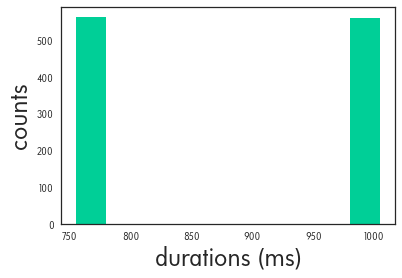

In [6]:
plt.hist(timeGoCue-timeTouchHeld)
plt.ylabel('counts')
plt.xlabel('durations (ms)')

In [7]:
np.array((timeTouchHeld,timeGoCue)).T

array([[ 480, 1485],
       [ 420, 1425],
       [ 545, 1550],
       ...,
       [ 440, 1195],
       [ 540, 1545],
       [ 520, 1525]])

In [8]:
trial = 0
planPeriod = nel.EpochArray(np.array((timeTouchHeld,timeGoCue)).T[trial])
movePeriod = nel.EpochArray(np.array((timeGoCue,timeTargetAcquire)).T[trial])
combinedPeriod = nel.EpochArray(np.array((timeTouchHeld,timeTargetAcquire)).T[trial])

In [9]:
planPeriod.lengths

array([1005])

In [10]:
st = nel.SpikeTrainArray(time=spikeTimes[trial],support=combinedPeriod,fs=1)

In [11]:
avg_firing_rates = st.n_spikes / st.support.duration
print(avg_firing_rates)

[0.00196721 0.0104918  0.00262295 0.0157377  0.01967213 0.00786885
 0.00983607 0.02032787 0.00852459 0.         0.         0.00786885
 0.00983607 0.00655738 0.00131148 0.00852459 0.00786885 0.01180328
 0.01114754 0.00065574 0.02622951 0.02491803 0.00262295 0.01704918
 0.00327869 0.00852459 0.01508197 0.0295082  0.02360656 0.01442623
 0.01770492 0.02491803 0.01967213 0.03278689 0.0157377  0.00196721
 0.01114754 0.00786885 0.02557377 0.03081967 0.00983607 0.00196721
 0.00655738 0.03803279 0.00393443 0.00065574 0.00590164 0.01836066
 0.01245902 0.00262295 0.03147541 0.00065574 0.         0.00918033
 0.00131148 0.01508197 0.03803279 0.01311475 0.0157377  0.
 0.00721311 0.00459016 0.02032787 0.         0.0052459  0.00721311
 0.01442623 0.         0.         0.         0.01704918 0.00131148
 0.00393443 0.         0.00196721 0.00786885 0.         0.00721311
 0.         0.00196721 0.01704918 0.0157377  0.00655738 0.
 0.00918033 0.00590164 0.00721311 0.00327869 0.00065574 0.00065574
 0.01639344

/home/shayok/Documents/Code/nelpy/nelpy/plotting/core.py:1021: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


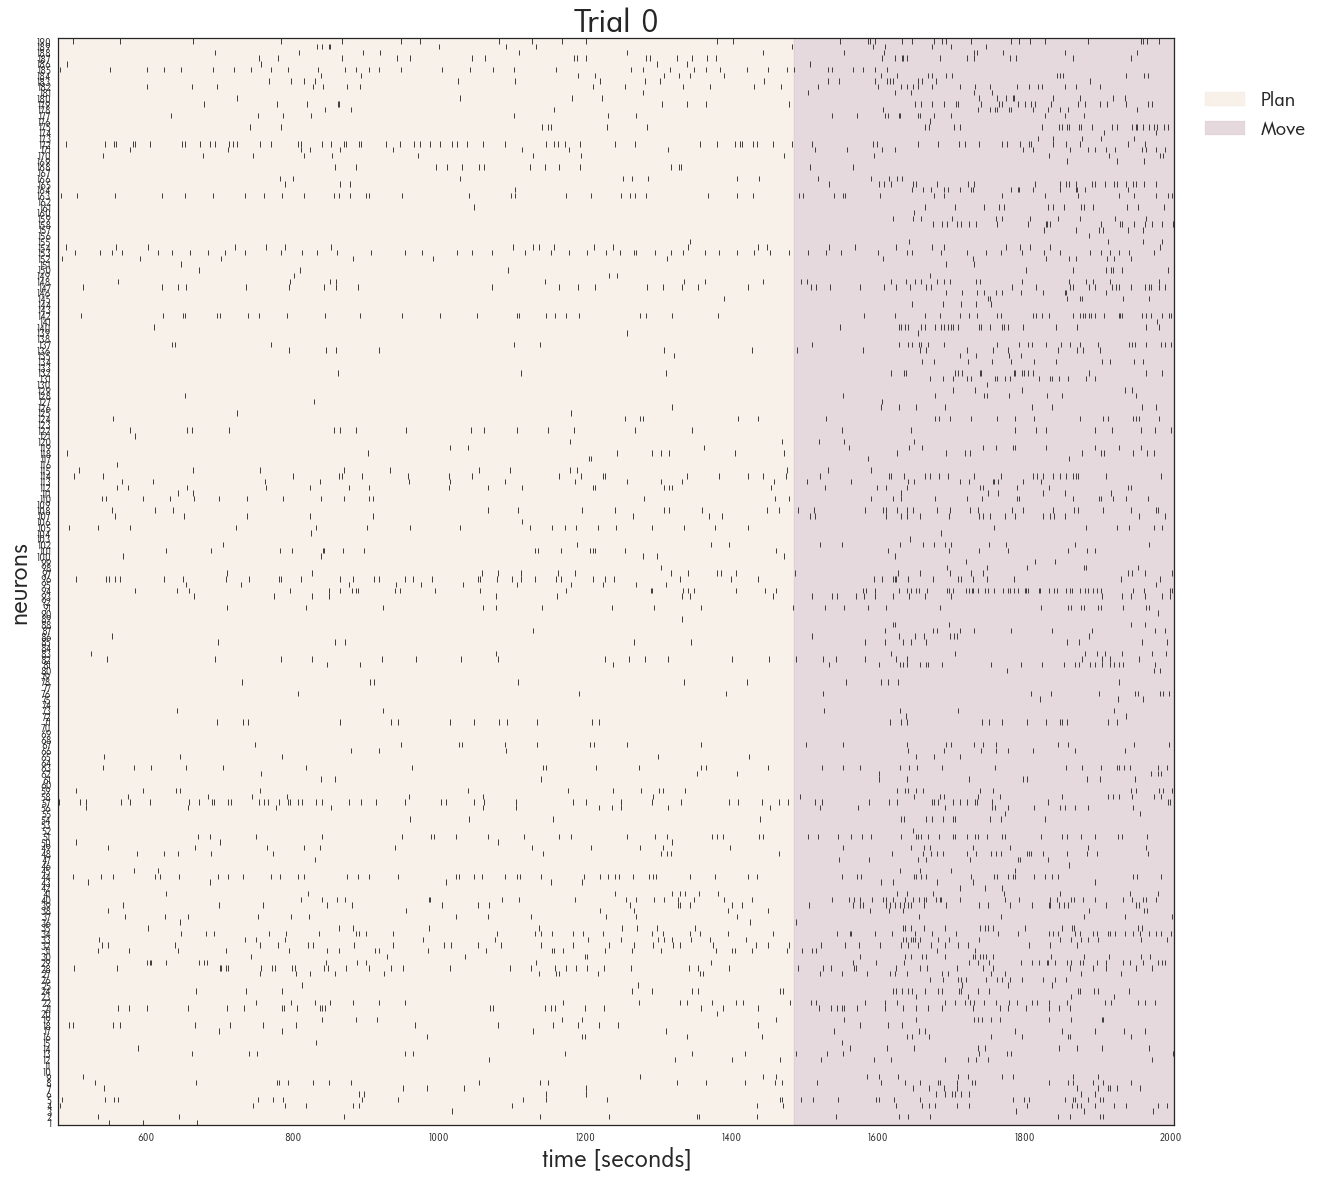

In [12]:
fig, ax = plt.subplots(ncols=1,figsize=(20,20))
npl.rasterplot(st,lw=1,ax=ax) 
ax.set_xlabel('time [seconds]')
ax.set_ylabel('neurons')
plt.title('Trial 0')
ax.set_xlim(combinedPeriod.time.squeeze());
npl.epochplot(planPeriod,alpha=0.15,hatch='',color=npl.colors.cows.jersey,label='Plan')
npl.epochplot(movePeriod,alpha=0.15,hatch='',color=npl.colors.cows.texas_aggie,label='Move')
plt.legend(loc=(1.02,0.9))

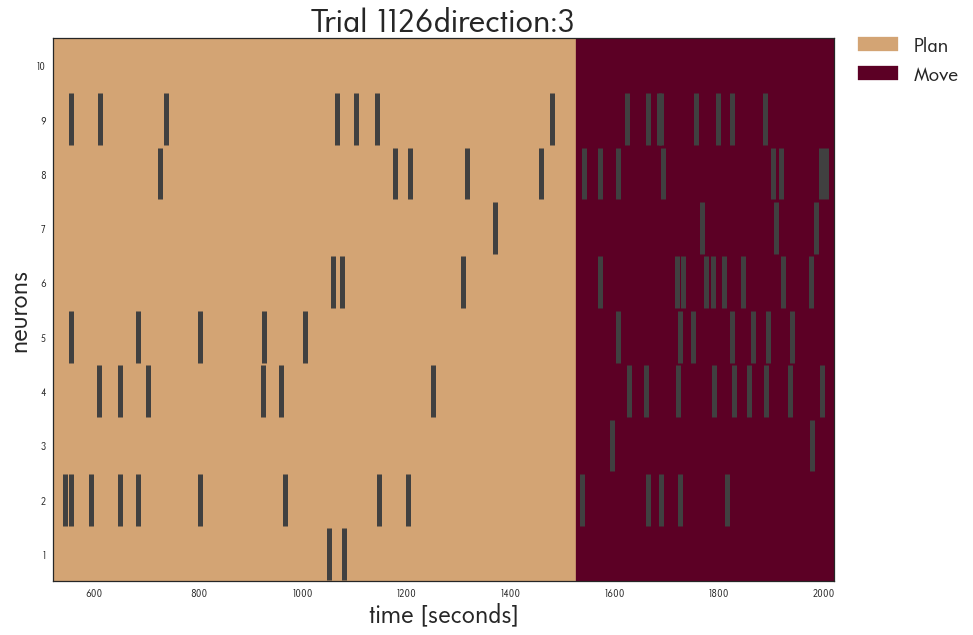

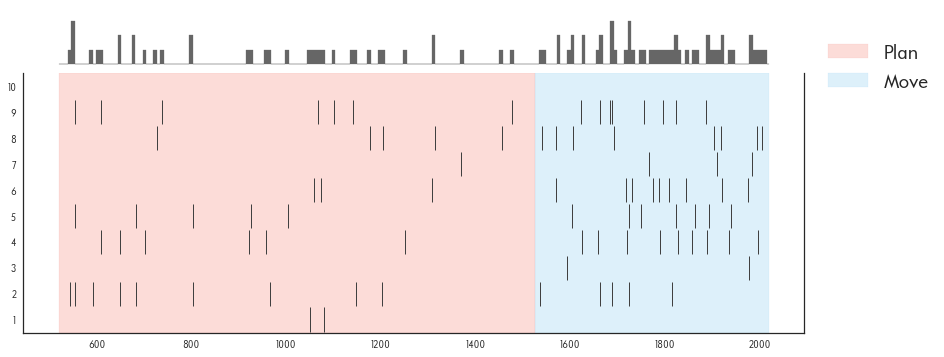

In [14]:
trial = 1126
usefulNeuron = 25
planPeriod = nel.EpochArray(np.array((timeTouchHeld,timeGoCue)).T[trial])
movePeriod = nel.EpochArray(np.array((timeGoCue,timeTargetAcquire)).T[trial])
combinedPeriod = nel.EpochArray(np.array((timeTouchHeld,timeTargetAcquire)).T[trial])
st = nel.SpikeTrainArray(time=spikeTimes[trial][0:10],support=combinedPeriod,fs=1)
fig, ax = plt.subplots(ncols=1,figsize=(14,10))
npl.rasterplot(st,lw=5,ax=ax) 
ax.set_xlabel('time [seconds]')
ax.set_ylabel('neurons')
plt.title('Trial '+str(trial)+ 'direction:'+str(cfr[trial]))
ax.set_xlim(combinedPeriod.time.squeeze());
npl.epochplot(planPeriod,alpha=1,hatch='',color=npl.colors.cows.jersey,label='Plan')
npl.epochplot(movePeriod,alpha=1,hatch='',color=npl.colors.cows.texas_aggie,label='Move')
plt.legend(loc=(1.02,0.9))

npl.rastercountplot(st, lw=1, nbins=200,)
plt.title('Trial '+str(trial)+ 'direction:'+str(cfr[trial]))
npl.epochplot(planPeriod, alpha=0.2, hatch='', color=npl.colors.sweet.red, label='Plan')
npl.epochplot(movePeriod, alpha=0.2, hatch='', color=npl.colors.sweet.blue, label='Move')
plt.legend(loc=(1.02,0.9))

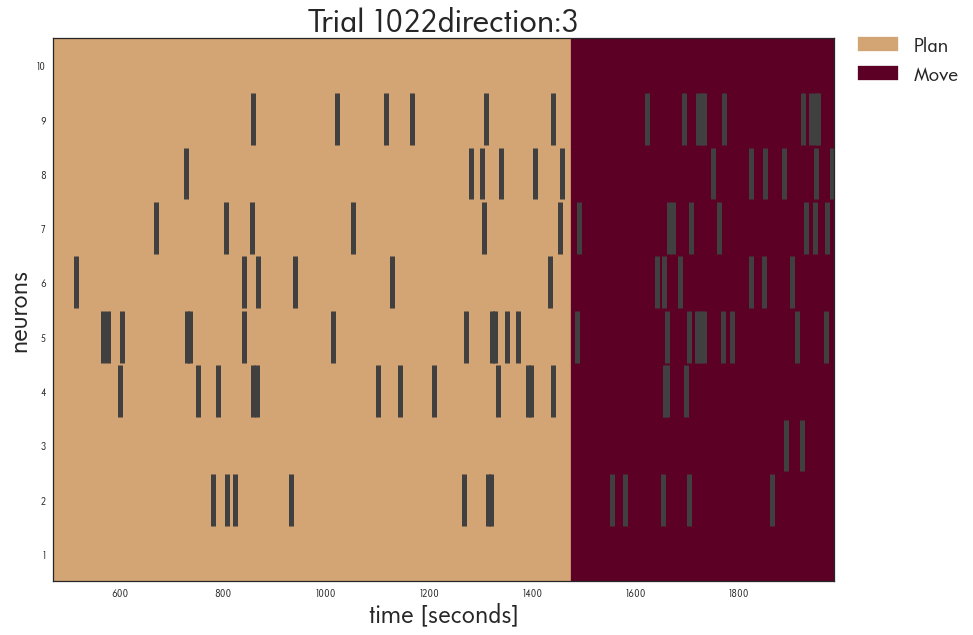

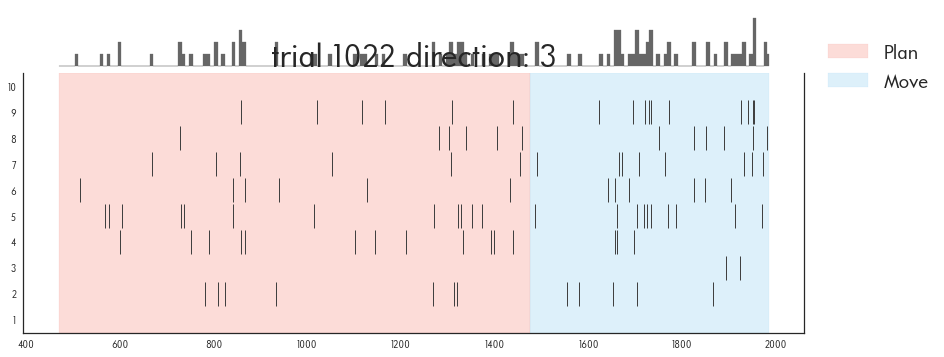

In [27]:
trial = 1022
usefulNeuron = 25
planPeriod = nel.EpochArray(np.array((timeTouchHeld,timeGoCue)).T[trial])
movePeriod = nel.EpochArray(np.array((timeGoCue,timeTargetAcquire)).T[trial])
combinedPeriod = nel.EpochArray(np.array((timeTouchHeld,timeTargetAcquire)).T[trial])
st = nel.SpikeTrainArray(time=spikeTimes[trial][0:10],support=combinedPeriod,fs=1)
fig, ax = plt.subplots(ncols=1,figsize=(14,10))
npl.rasterplot(st,lw=5,ax=ax) 
ax.set_xlabel('time [seconds]')
ax.set_ylabel('neurons')
plt.title('Trial '+str(trial)+ 'direction:'+str(cfr[trial]))
ax.set_xlim(combinedPeriod.time.squeeze());
npl.epochplot(planPeriod,alpha=1,hatch='',color=npl.colors.cows.jersey,label='Plan')
npl.epochplot(movePeriod,alpha=1,hatch='',color=npl.colors.cows.texas_aggie,label='Move')
plt.legend(loc=(1.02,0.9))

npl.rastercountplot(st, lw=1, nbins=200,)
plt.title('trial '+str(trial)+ ' direction: '+str(cfr[trial]))
npl.epochplot(planPeriod, alpha=0.2, hatch='', color=npl.colors.sweet.red, label='Plan')
npl.epochplot(movePeriod, alpha=0.2, hatch='', color=npl.colors.sweet.blue, label='Move')
plt.legend(loc=(1.02,0.9))
plt.savefig('trial'+str(trial)+ 'direction:'+str(cfr[trial])+'.svg',bbox=None)

In [23]:
np.where(cfr==3)

(array([  14,   21,   27,   34,   46,   55,   56,   66,   74,   86,   93,
          97,  104,  105,  118,  122,  126,  133,  136,  161,  162,  168,
         172,  182,  186,  196,  198,  215,  224,  232,  233,  242,  247,
         263,  267,  276,  281,  290,  293,  307,  308,  319,  327,  331,
         337,  343,  348,  358,  368,  382,  395,  400,  410,  411,  418,
         420,  428,  442,  447,  456,  457,  470,  476,  477,  495,  497,
         504,  518,  529,  533,  539,  548,  560,  565,  576,  578,  594,
         598,  600,  607,  620,  633,  638,  642,  657,  664,  666,  674,
         680,  695,  696,  713,  720,  730,  735,  736,  742,  754,  758,
         775,  776,  800,  804,  807,  817,  825,  830,  845,  860,  865,
         878,  880,  893,  894,  907,  909,  924,  933,  934,  947,  951,
         952,  965,  978,  981,  983, 1001, 1009, 1022, 1026, 1036, 1037,
        1053, 1056, 1062, 1074, 1084, 1087, 1095, 1101, 1113, 1123, 1126]),)